# CPE 102 Final Project
- **Instructor:** Engr. Cris Paulo G. Hate, M. Engg.
- **Section:** CPE31S1
- **Members:**
  1. Jayme, Karla Danielle
  2. Mayordo, Zherish Galvin
  3. Natividad, Marc Alvin
- **NOTE:** This project was executed using Google Colab as this project is process and memory intensive.

## Cloning YoloV5

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14441, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 14441 (delta 42), reused 43 (delta 22), pack-reused 14371
Receiving objects: 100% (14441/14441), 13.63 MiB | 19.02 MiB/s, done.
Resolving deltas: 100% (9936/9936), done.


In [2]:
!pip install -r ./yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 5.1 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 67.8 MB/s 


## Downloading Dataset

### Steps
1. Download dataset here: https://www.kaggle.com/datasets/aditya276/face-mask-dataset-yolo-format?resource=download
2. Upload to zip to Google Colab. (If `gdown` is not working.)
3. Unzip

#### Alternative
1. Get kaggle API key
2. Follow these instructions: https://www.kaggle.com/general/156610

In [19]:
!pip install -q kaggle

In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [24]:
!pwd

/content


In [26]:
!kaggle datasets download -d aditya276/face-mask-dataset-yolo-format

 95% 191M/202M [00:01<00:00, 156MB/s]
100% 202M/202M [00:01<00:00, 120MB/s]


In [27]:
!unzip face-mask-dataset-yolo-format.zip

Archive:  face-mask-dataset-yolo-format.zip
  inflating: dataset/images/classes.txt  
  inflating: dataset/images/test/NUZZHAB7IMI6VHQQW44IVOMBHU.jpg  
  inflating: dataset/images/test/NUZZHAB7IMI6VHQQW44IVOMBHU.txt  
  inflating: dataset/images/test/OIP7vZHgEGheRWy-R6I19P3TQHaE8.jpg  
  inflating: dataset/images/test/OIP7vZHgEGheRWy-R6I19P3TQHaE8.txt  
  inflating: dataset/images/test/P0000100005637_3_37742.jpg  
  inflating: dataset/images/test/P0000100005637_3_37742.txt  
  inflating: dataset/images/test/PA-49784209-1024x684.jpg  
  inflating: dataset/images/test/PA-49784209-1024x684.txt  
  inflating: dataset/images/test/PHOTriZgIKIgsnNLdBJG75vj200203_1000x2000.jpg  
  inflating: dataset/images/test/PHOTriZgIKIgsnNLdBJG75vj200203_1000x2000.txt  
  inflating: dataset/images/test/PRI_129079114_1580299603.195.jpg  
  inflating: dataset/images/test/PRI_129079114_1580299603.195.txt  
  inflating: dataset/images/test/Pakistan-China-coronavirus-92news.jpg  
  inflating: dataset/images/tes

## Viewing Images

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def showimg(path_img:str, path_txt:str, classes:list):
    image = plt.imread(path_img)
    colors = [(0, 255, 255), (0, 255, 0)]

    height, width, _ = image.shape

    T=[]
    with open(path_txt, "r") as file1:
        for line in file1.readlines():
            split = line.split(" ")

            # getting the class id
            class_id = int(split[0])
            color = colors[class_id]

            # getting the xywh bounding box coordinates
            x, y, w, h = float(split[1]), float(split[2]), float(split[3]), float(split[4])

            # re-scaling xywh to the image size
            box = [int((x - 0.5*w)* width), int((y - 0.5*h) * height), int(w*width), int(h*height)]
            cv2.rectangle(image, box, color, 2)
            cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
            cv2.putText(image, classes[0][class_id], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))

    plt.imshow(image)

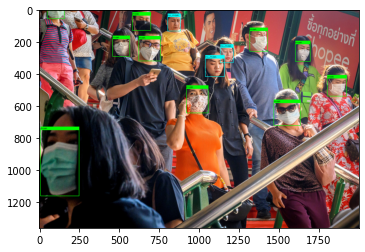

In [29]:
import pandas

classes = pandas.read_csv("dataset/images/classes.txt", header=None)
showimg("dataset/images/train/-1x-1.jpg", "dataset/images/train/-1x-1.txt", classes)

## Creating Labels Folder

In [30]:
import os, shutil, random

def createLabels():
    data_path = "./dataset/"

    training_images_path = data_path + "images/train/"
    validation_images_path = data_path + "images/valid/"

    training_labels_path = data_path + "labels/train/"
    validation_labels_path = data_path + "labels/valid/"

    # Create labels directory
    if os.path.exists(data_path + "labels/"):
        shutil.rmtree(data_path + "labels/")
    os.mkdir(data_path + "labels/")

    os.mkdir(training_labels_path)
    os.mkdir(validation_labels_path)

    # Moving annotation files to their specified folders
    annotations = []
    print("Moving training labels to their respective folder.")
    for r, d, f in os.walk(training_images_path):
        for file in f:
            ext = ".txt"
            if file.endswith(ext):
                annotations.append(file)

    for i in range(len(annotations)):
        img_path = training_images_path + annotations[i]
        shutil.copy(img_path, training_labels_path)

    # Moving annotation files to their specified folders
    annotations = []
    print("Moving validation labels to their respective folder.")
    for r, d, f in os.walk(validation_images_path):
        for file in f:
            ext = ".txt"
            if file.endswith(ext):
                annotations.append(file)

    for i in range(len(annotations)):
        img_path = validation_images_path + annotations[i]
        shutil.copy(img_path, validation_labels_path)

    print("Finished.")

createLabels()

Moving training labels to their respective folder.
Moving validation labels to their respective folder.
Finished.


## Training YoloV5

### Steps
1. Upload `dataset.yaml` file <br>
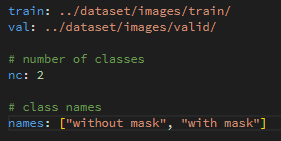
2. Run shell command:<br>
  `py ./yolov5/train.py --img 640 --batch 10 --epochs 50 --data ./dataset.yaml --weights yolov5n.pt`

In [46]:
# Using shell commands
!python yolov5/train.py --img 640 --batch 10 --epochs 50 --data ../content/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=../content/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

## Testing the trained model

### Steps
1. Download the `.pt` file from `/content/yolov5/runs/train/exp6/weights/best.pt`
2. Run `!python yolov5/detect.py --weights path/to/best.pt --source 0`

In [45]:
# Using shell commands (This will not work in Google Colab)
# !python yolov5/detect.py --weights yolov5/runs/train/exp6/weights/best.pt --source 0

detect: weights=['yolov5/runs/train/exp6/weights/best.pt'], source=0, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-30-g342fe05 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.157] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "yolov5/detect.py", line 261, in <module>
    main(opt)
  File "yolov5/detect.py", line 256, in 